# Aerolinea - DB5A
Master en Big Data Science - Universidad de Navarra <br>
Gestion de Proyectos y Vision de Negocio <br>
Marzo 2025 <br>
Leyre de la Cazalda, Pablo Benavides, Dick Rogeir Lizana, Carmen Casado y Diego de Lemos

# Importamos las librerias necesarias para realizar el trabajo

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io
from google.colab import files
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Leemos la base de datos final previamente trabajada en el antiguo notebook

In [ ]:
# prompt: importa fichero csv como df desde drive

from google.colab import drive
drive.mount('/content/drive')

# Replace 'your_file_path_in_drive.csv' with the actual path to your CSV file in Google Drive
df = pd.read_csv('/content/drive/My Drive/TFG_DB5A/aerolinea_final.csv')


Mounted at /content/drive


In [ ]:
#df = pd.read_csv('/content/aerolinea_final.csv', sep=",")

#df.head()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 26 columns):
 #   Column                             Non-Null Count   Dtype
---  ------                             --------------   -----
 0   id                                 129880 non-null  int64
 1   Age                                129880 non-null  int64
 2   Class                              129880 non-null  int64
 3   Flights per year                   129880 non-null  int64
 4   Flight Distance                    129880 non-null  int64
 5   Inflight wifi service              129880 non-null  int64
 6   Departure/Arrival time convenient  129880 non-null  int64
 7   Ease of Online booking             129880 non-null  int64
 8   Gate location                      129880 non-null  int64
 9   Food and drink                     129880 non-null  int64
 10  Online boarding                    129880 non-null  int64
 11  Seat comfort                       129880 non-null  int64
 12  In

# NAs

In [ ]:
df.isna().sum()

,0
id,0
Age,0
Class,0
Flights per year,0
Flight Distance,0
Inflight wifi service,0
Departure/Arrival time convenient,0
Ease of Online booking,0
Gate location,0
Food and drink,0


# Eliminamos las columnas que no aportan valor al modelo

In [ ]:
df = df.drop(columns=['id'])

# Separacion de variable predictora y objetivo

In [ ]:
X = df.drop(columns=['satisfaction'])
y = df['satisfaction']

# Train & Test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (97410, 24)
X_test shape: (32470, 24)
y_train shape: (97410,)
y_test shape: (32470,)


# Definicion del modelo

In [ ]:
model = Sequential([
    Dense(64, input_shape=(X_train.shape[1],), activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,713 (14.50 KB)

 Trainable params: 3,713 (14.50 KB)

 Non-trainable params: 0 (0.00 B)

# Entrenamiento

In [ ]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/20
2436/2436 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7099 - loss: 1.1301 - val_accuracy: 0.8572 - val_loss: 0.3598
Epoch 2/20
2436/2436 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8192 - loss: 0.4852 - val_accuracy: 0.7384 - val_loss: 0.7616
Epoch 3/20
2436/2436 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.8394 - loss: 0.4217 - val_accuracy: 0.8559 - val_loss: 0.3894
Epoch 4/20
2436/2436 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8480 - loss: 0.3879 - val_accuracy: 0.8781 - val_loss: 0.3222
Epoch 5/20
2436/2436 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8523 - loss: 0.3795 - val_accuracy: 0.8928 - val_loss: 0.2782
Epoch 6/20
2436/2436 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8720 - loss: 0.3220 - val_accuracy: 0.8918 - val_loss: 0.2761
Epoch 7/20
2436/2436 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8867 - loss: 0.2874 - val_accuracy: 0.9004 - val_loss: 0.2499
Epoch 8/20
2436/2436 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8934 - loss: 0.2685

# Evaluacion

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

1015/1015 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9187 - loss: 0.1943
Test Accuracy: 0.9186


# Predicciones

In [ ]:
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

1015/1015 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


              precision    recall  f1-score   support

           0       0.90      0.96      0.93     18347
           1       0.94      0.87      0.90     14123

    accuracy                           0.92     32470
   macro avg       0.92      0.91      0.92     32470
weighted avg       0.92      0.92      0.92     32470

Confusion Matrix:
 [[17562   785]
 [ 1857 12266]]


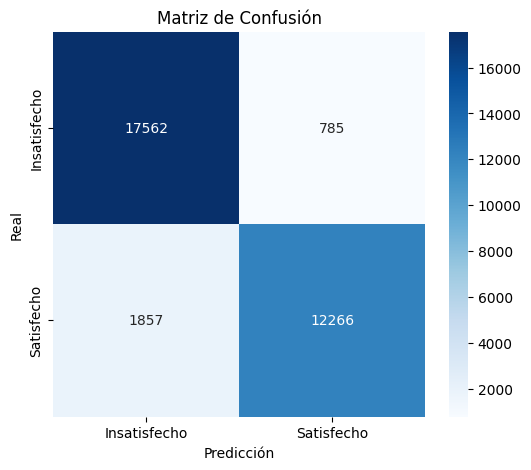

In [ ]:
# Matriz de confusión
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Insatisfecho', 'Satisfecho'], yticklabels=['Insatisfecho', 'Satisfecho'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

# Visualizacion de resultados

## Grafico de perdida

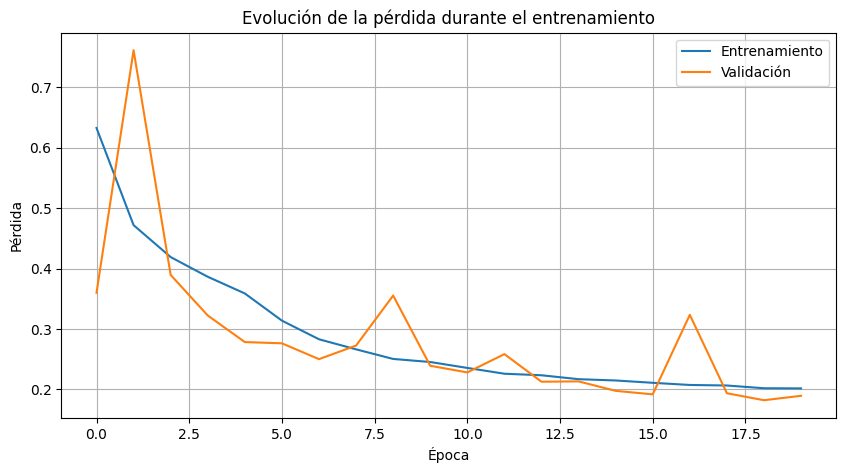

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Evolución de la pérdida durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.grid(True)
plt.show()

## Grafico de accuracy

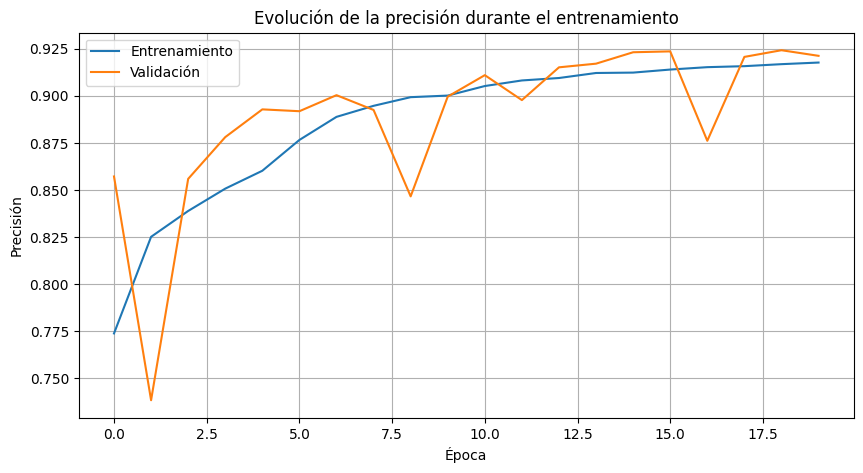

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Evolución de la precisión durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()
plt.grid(True)
plt.show()

# Modelo XGBoost


In [ ]:
# Instalar xgboost si es necesario
# !pip install xgboost

import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Inicializar el clasificador XGBoost
# Puedes ajustar los hiperparámetros (ej: n_estimators, learning_rate, max_depth)
xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss')

# Entrenar el modelo XGBoost
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97     18347
           1       0.97      0.94      0.96     14123

    accuracy                           0.96     32470
   macro avg       0.96      0.96      0.96     32470
weighted avg       0.96      0.96      0.96     32470

XGBoost Confusion Matrix:
 [[17954   393]
 [  824 13299]]


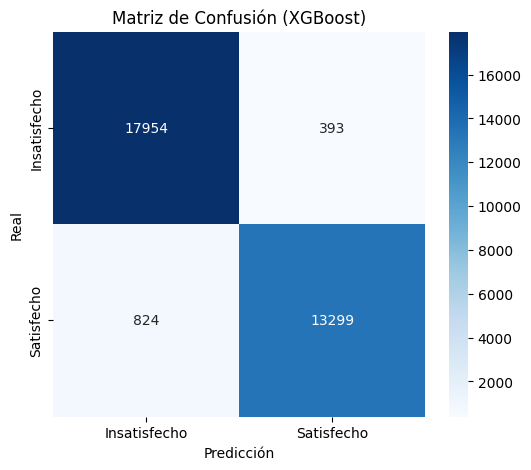

In [ ]:
# Predicciones con el modelo XGBoost
y_pred_xgb = xgb_model.predict(X_test)

# Reporte de clasificación
print("XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))

# Matriz de confusión
print("XGBoost Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))

conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=['Insatisfecho', 'Satisfecho'], yticklabels=['Insatisfecho', 'Satisfecho'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión (XGBoost)')
plt.show()

# Modelo de Regresión Logística

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Inicializar el modelo de Regresión Logística
# Puedes ajustar los hiperparámetros (ej: C, penalty)
log_reg_model = LogisticRegression(solver='liblinear', random_state=42)

# Entrenar el modelo de Regresión Logística
log_reg_model.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.92      0.90     18347
           1       0.89      0.82      0.86     14123

    accuracy                           0.88     32470
   macro avg       0.88      0.87      0.88     32470
weighted avg       0.88      0.88      0.88     32470

Logistic Regression Confusion Matrix:
 [[16958  1389]
 [ 2509 11614]]


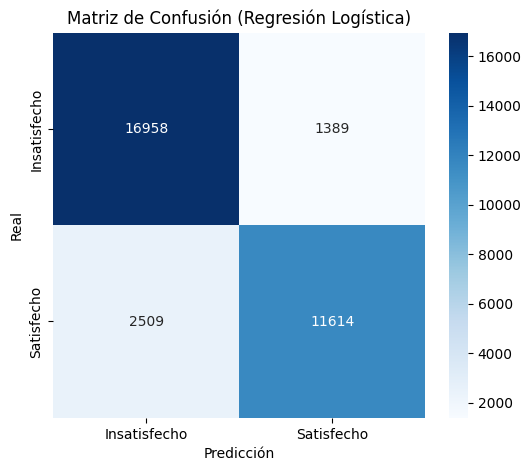

In [ ]:
# Predicciones con el modelo de Regresión Logística
y_pred_log_reg = log_reg_model.predict(X_test)

# Reporte de clasificación
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_log_reg))

# Matriz de confusión
print("Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log_reg))

conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix_log_reg, annot=True, fmt='d', cmap='Blues', xticklabels=['Insatisfecho', 'Satisfecho'], yticklabels=['Insatisfecho', 'Satisfecho'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión (Regresión Logística)')
plt.show()

# Modelo Support Vector Machine (SVM)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Es recomendable escalar los datos para SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inicializar el modelo SVM
# Puedes ajustar el kernel (ej: 'linear', 'rbf', 'poly') y otros hiperparámetros (ej: C, gamma)
# Empezamos con un kernel RBF que es común
svm_model = SVC(kernel='rbf', random_state=42)

# Entrenar el modelo SVM con los datos escalados
svm_model.fit(X_train_scaled, y_train)

SVC(random_state=42)

SVM Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96     18347
           1       0.96      0.93      0.95     14123

    accuracy                           0.95     32470
   macro avg       0.95      0.95      0.95     32470
weighted avg       0.95      0.95      0.95     32470

SVM Confusion Matrix:
 [[17781   566]
 [  939 13184]]


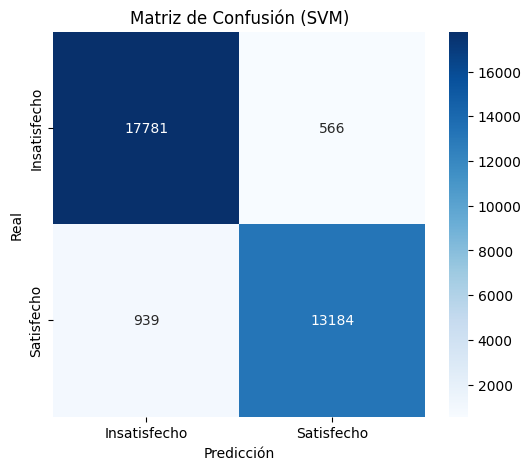

In [ ]:
# Predicciones con el modelo SVM (usando datos escalados)
y_pred_svm = svm_model.predict(X_test_scaled)

# Reporte de clasificación
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))

# Matriz de confusión
print("SVM Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))

conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['Insatisfecho', 'Satisfecho'], yticklabels=['Insatisfecho', 'Satisfecho'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión (SVM)')
plt.show()

# Modelo K-Nearest Neighbors (KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# KNN también es sensible a la escala, por lo que usamos los datos escalados previamente
# Si no has escalado los datos para SVM, hazlo aquí:
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# Inicializar el modelo KNN
# Puedes ajustar el número de vecinos (n_neighbors)
# Un valor común inicial es 5
knn_model = KNeighborsClassifier(n_neighbors=5)

# Entrenar el modelo KNN con los datos escalados
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier()

KNN Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94     18347
           1       0.95      0.88      0.92     14123

    accuracy                           0.93     32470
   macro avg       0.93      0.92      0.93     32470
weighted avg       0.93      0.93      0.93     32470

KNN Confusion Matrix:
 [[17712   635]
 [ 1661 12462]]


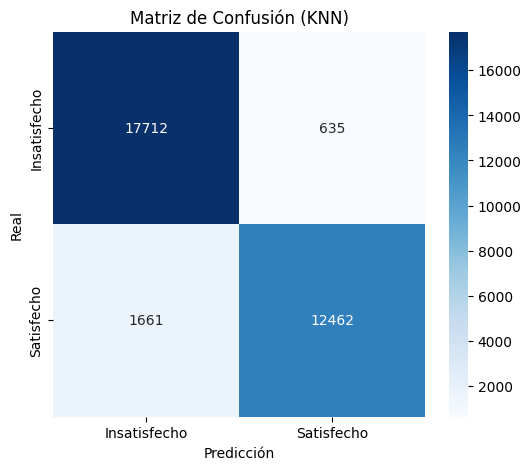

In [ ]:
# Predicciones con el modelo KNN (usando datos escalados)
y_pred_knn = knn_model.predict(X_test_scaled)

# Reporte de clasificación
print("KNN Classification Report:\n", classification_report(y_test, y_pred_knn))

# Matriz de confusión
print("KNN Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))

conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues', xticklabels=['Insatisfecho', 'Satisfecho'], yticklabels=['Insatisfecho', 'Satisfecho'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión (KNN)')
plt.show()

# Modelo Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Inicializar el modelo Random Forest
# Puedes ajustar hiperparámetros como n_estimators, max_depth, criterion, etc.
# Un buen punto de partida es un número decente de estimadores (árboles)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo Random Forest
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97     18347
           1       0.97      0.94      0.96     14123

    accuracy                           0.96     32470
   macro avg       0.96      0.96      0.96     32470
weighted avg       0.96      0.96      0.96     32470

Random Forest Confusion Matrix:
 [[17968   379]
 [  849 13274]]


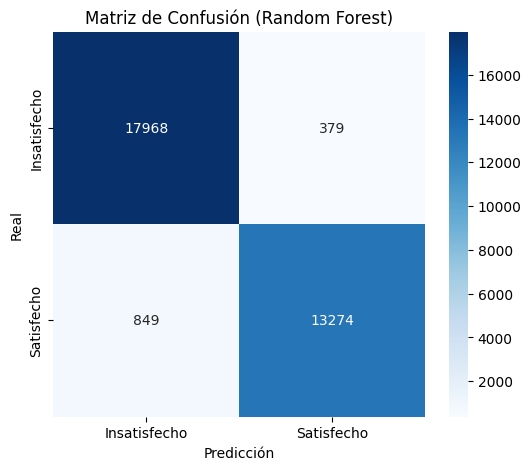

In [ ]:
# Predicciones con el modelo Random Forest
y_pred_rf = rf_model.predict(X_test)

# Reporte de clasificación
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

# Matriz de confusión
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Insatisfecho', 'Satisfecho'], yticklabels=['Insatisfecho', 'Satisfecho'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión (Random Forest)')
plt.show()

# Modelo Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Inicializar el modelo Naive Bayes Gaussiano
# GaussianNB es adecuado para datos continuos que se asumen gaussianos
gnb_model = GaussianNB()

# Entrenar el modelo Naive Bayes
gnb_model.fit(X_train, y_train)

GaussianNB()

Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.90      0.88     18347
           1       0.86      0.82      0.84     14123

    accuracy                           0.86     32470
   macro avg       0.86      0.86      0.86     32470
weighted avg       0.86      0.86      0.86     32470

Naive Bayes Confusion Matrix:
 [[16492  1855]
 [ 2539 11584]]


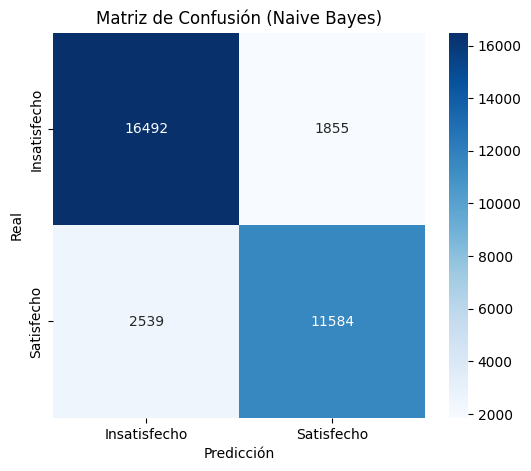

In [ ]:
# Predicciones con el modelo Naive Bayes
y_pred_gnb = gnb_model.predict(X_test)

# Reporte de clasificación
print("Naive Bayes Classification Report:\n", classification_report(y_test, y_pred_gnb))

# Matriz de confusión
print("Naive Bayes Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gnb))

conf_matrix_gnb = confusion_matrix(y_test, y_pred_gnb)
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix_gnb, annot=True, fmt='d', cmap='Blues', xticklabels=['Insatisfecho', 'Satisfecho'], yticklabels=['Insatisfecho', 'Satisfecho'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión (Naive Bayes)')
plt.show()

# Comparativa de Modelos

In [ ]:
import pandas as pd
from sklearn.metrics import classification_report

# Vamos a recopilar las métricas clave de cada modelo en un diccionario

results = {}

# Modelo Red Neuronal
# Asegúrate de que y_pred_nn esté disponible. Si no, genera las predicciones:
# y_pred_nn_prob = model.predict(X_test)
# y_pred_nn = (y_pred_nn_prob > 0.5).astype(int)
report_nn = classification_report(y_test, y_pred, output_dict=True) # Usando y_pred de la primera evaluación
results['Red Neuronal'] = {
    'Accuracy': report_nn['accuracy'],
    'Precision (Satisfecho)': report_nn['1']['precision'],
    'Recall (Satisfecho)': report_nn['1']['recall'],
    'F1-score (Satisfecho)': report_nn['1']['f1-score']
}


# Modelo XGBoost
# Asegúrate de que y_pred_xgb esté disponible
report_xgb = classification_report(y_test, y_pred_xgb, output_dict=True)
results['XGBoost'] = {
    'Accuracy': report_xgb['accuracy'],
    'Precision (Satisfecho)': report_xgb['1']['precision'],
    'Recall (Satisfecho)': report_xgb['1']['recall'],
    'F1-score (Satisfecho)': report_xgb['1']['f1-score']
}

# Modelo Regresión Logística
# Asegúrate de que y_pred_log_reg esté disponible
report_log_reg = classification_report(y_test, y_pred_log_reg, output_dict=True)
results['Regresión Logística'] = {
    'Accuracy': report_log_reg['accuracy'],
    'Precision (Satisfecho)': report_log_reg['1']['precision'],
    'Recall (Satisfecho)': report_log_reg['1']['recall'],
    'F1-score (Satisfecho)': report_log_reg['1']['f1-score']
}

# Modelo SVM
# Asegúrate de que y_pred_svm esté disponible
report_svm = classification_report(y_test, y_pred_svm, output_dict=True)
results['SVM'] = {
    'Accuracy': report_svm['accuracy'],
    'Precision (Satisfecho)': report_svm['1']['precision'],
    'Recall (Satisfecho)': report_svm['1']['recall'],
    'F1-score (Satisfecho)': report_svm['1']['f1-score']
}

# Modelo KNN
# Asegúrate de que y_pred_knn esté disponible
report_knn = classification_report(y_test, y_pred_knn, output_dict=True)
results['KNN'] = {
    'Accuracy': report_knn['accuracy'],
    'Precision (Satisfecho)': report_knn['1']['precision'],
    'Recall (Satisfecho)': report_knn['1']['recall'],
    'F1-score (Satisfecho)': report_knn['1']['f1-score']
}

# Modelo Naive Bayes
# Asegúrate de que y_pred_gnb esté disponible
report_gnb = classification_report(y_test, y_pred_gnb, output_dict=True)
results['Naive Bayes'] = {
    'Accuracy': report_gnb['accuracy'],
    'Precision (Satisfecho)': report_gnb['1']['precision'],
    'Recall (Satisfecho)': report_gnb['1']['recall'],
    'F1-score (Satisfecho)': report_gnb['1']['f1-score']
}

# Convertir los resultados a un DataFrame de pandas para una mejor visualización
results_df = pd.DataFrame(results).T

# Mostrar el DataFrame de resultados
print(results_df)

                     Accuracy  Precision (Satisfecho)  Recall (Satisfecho)  \
Red Neuronal         0.918633                0.939851             0.868512   
XGBoost              0.962519                0.971297             0.941655   
Regresión Logística  0.879951                0.893178             0.822347   
SVM                  0.953650                0.958836             0.933513   
KNN                  0.929289                0.951516             0.882390   
Naive Bayes          0.864675                0.861969             0.820222   

                     F1-score (Satisfecho)  
Red Neuronal                      0.902775  
XGBoost                           0.956247  
Regresión Logística               0.856300  
SVM                               0.946005  
KNN                               0.915650  
Naive Bayes                       0.840578  


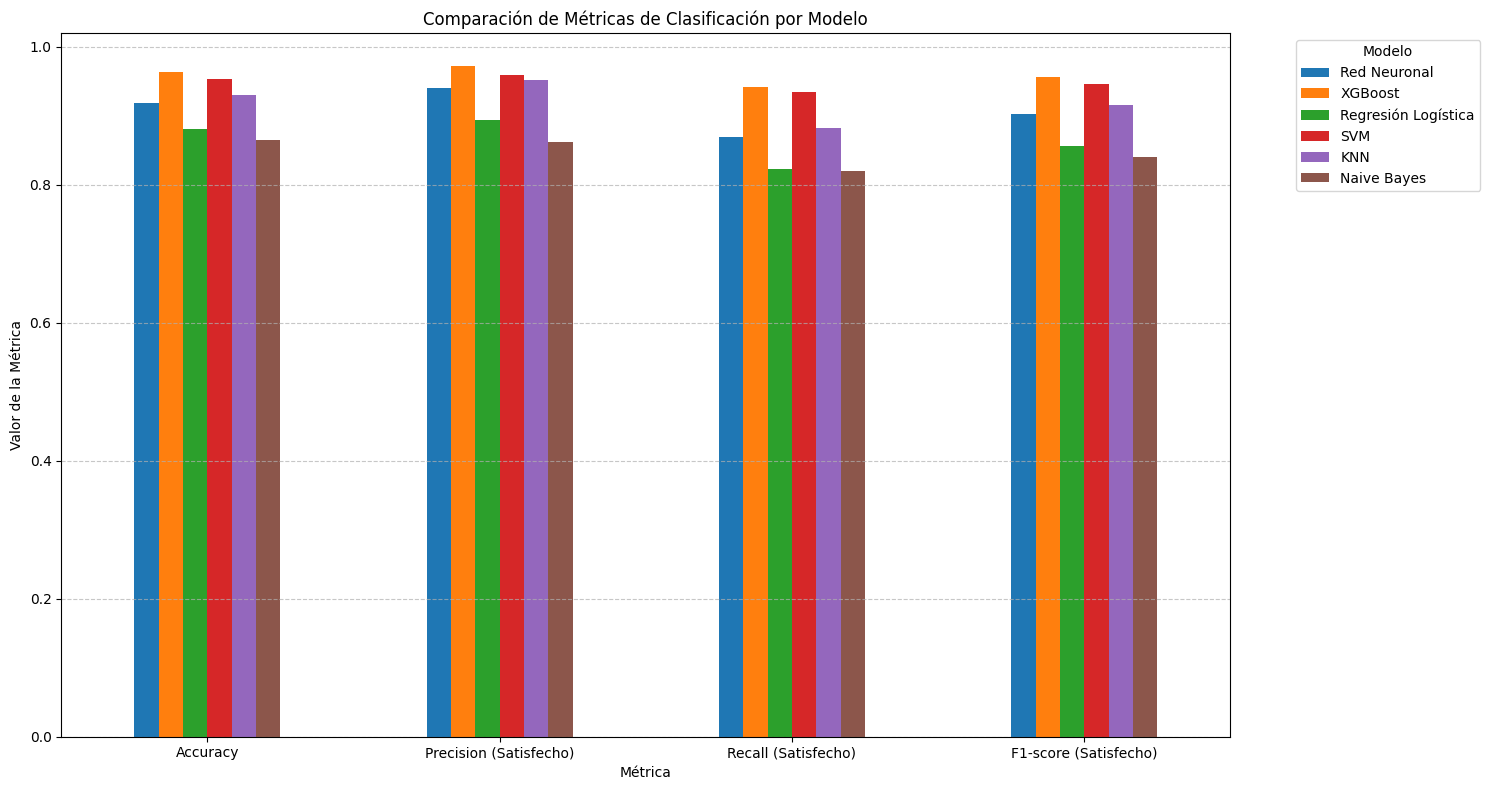

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Asegúrate de que results_df está disponible (generado en la celda anterior)

# Transponer el DataFrame para que las métricas sean las filas
results_df_transposed = results_df.T

# Crear el gráfico de barras
results_df_transposed.plot(kind='bar', figsize=(15, 8))

plt.title('Comparación de Métricas de Clasificación por Modelo')
plt.ylabel('Valor de la Métrica')
plt.xlabel('Métrica')
plt.xticks(rotation=0) # Para que los nombres de las métricas no giren
plt.legend(title='Modelo', bbox_to_anchor=(1.05, 1), loc='upper left') # Mover la leyenda fuera del gráfico
plt.grid(axis='y', linestyle='--', alpha=0.7) # Añadir cuadrícula en el eje y

plt.tight_layout() # Ajustar el diseño para evitar que los elementos se solapen
plt.show()

# Adicional

## Análisis de Falsos Positivos y Falsos Negativos

Aquí analizaremos los falsos positivos (predicciones de satisfecho cuando el real es insatisfecho) y falsos negativos (predicciones de insatisfecho cuando el real es satisfecho) para cada modelo. Esto es crucial para entender en qué tipo de errores se equivoca más cada modelo y cuál podría ser preferible dependiendo del costo de cada tipo de error.

Vamos a extraer estos valores de las matrices de confusión generadas anteriormente.

In [ ]:
# Función para extraer FP y FN de una matriz de confusión
def analyze_errors(conf_matrix):
    tn, fp, fn, tp = conf_matrix.ravel()
    return fp, fn

# Análisis para cada modelo
fp_nn, fn_nn = analyze_errors(conf_matrix)
fp_xgb, fn_xgb = analyze_errors(conf_matrix_xgb)
fp_log_reg, fn_log_reg = analyze_errors(conf_matrix_log_reg)
fp_svm, fn_svm = analyze_errors(conf_matrix_svm)
fp_knn, fn_knn = analyze_errors(conf_matrix_knn)
fp_gnb, fn_gnb = analyze_errors(conf_matrix_gnb)

# Crear un DataFrame para visualizar los resultados
error_analysis = {
    'Modelo': ['Red Neuronal', 'XGBoost', 'Regresión Logística', 'SVM', 'KNN', 'Naive Bayes'],
    'Falsos Positivos (FP)': [fp_nn, fp_xgb, fp_log_reg, fp_svm, fp_knn, fp_gnb],
    'Falsos Negativos (FN)': [fn_nn, fn_xgb, fn_log_reg, fn_svm, fn_knn, fn_gnb]
}

error_analysis_df = pd.DataFrame(error_analysis)

print("\nAnálisis de Falsos Positivos (FP) y Falsos Negativos (FN) por Modelo:")
display(error_analysis_df)

# Discusión sobre en qué errores preferimos equivocarnos
print("\n¿En qué errores preferimos equivocarnos?")
print("- Si el costo de un Falso Positivo (predecir 'Satisfecho' a un cliente 'Insatisfecho') es alto (ej: ofrecer beneficios innecesarios), preferiríamos un modelo con bajos FP.")
print("- Si el costo de un Falso Negativo (predecir 'Insatisfecho' a un cliente 'Satisfecho') es alto (ej: perder un cliente leal), preferiríamos un modelo con bajos FN.")
print("\nObservando los resultados:")
display(error_analysis_df.sort_values(by='Falsos Positivos (FP)'))
display(error_analysis_df.sort_values(by='Falsos Negativos (FN)'))


Análisis de Falsos Positivos (FP) y Falsos Negativos (FN) por Modelo:


,Modelo,Falsos Positivos (FP),Falsos Negativos (FN)
0,Red Neuronal,785,1857
1,XGBoost,393,824
2,Regresión Logística,1389,2509
3,SVM,566,939
4,KNN,635,1661
5,Naive Bayes,1855,2539



¿En qué errores preferimos equivocarnos?
- Si el costo de un Falso Positivo (predecir 'Satisfecho' a un cliente 'Insatisfecho') es alto (ej: ofrecer beneficios innecesarios), preferiríamos un modelo con bajos FP.
- Si el costo de un Falso Negativo (predecir 'Insatisfecho' a un cliente 'Satisfecho') es alto (ej: perder un cliente leal), preferiríamos un modelo con bajos FN.

Observando los resultados:


,Modelo,Falsos Positivos (FP),Falsos Negativos (FN)
1,XGBoost,393,824
3,SVM,566,939
4,KNN,635,1661
0,Red Neuronal,785,1857
2,Regresión Logística,1389,2509
5,Naive Bayes,1855,2539


,Modelo,Falsos Positivos (FP),Falsos Negativos (FN)
1,XGBoost,393,824
3,SVM,566,939
4,KNN,635,1661
0,Red Neuronal,785,1857
2,Regresión Logística,1389,2509
5,Naive Bayes,1855,2539


## Verificación del Balance de Clases en Train/Test

Es importante que la distribución de las clases (Satisfecho/Insatisfecho) sea similar en los conjuntos de entrenamiento y prueba para asegurar que el modelo no esté sesgado hacia la clase mayoritaria.

Distribución de clases en el conjunto de entrenamiento (%):
satisfaction
0    56.570167
1    43.429833
Name: proportion, dtype: float64

Distribución de clases en el conjunto de prueba (%):
satisfaction
0    56.504466
1    43.495534
Name: proportion, dtype: float64


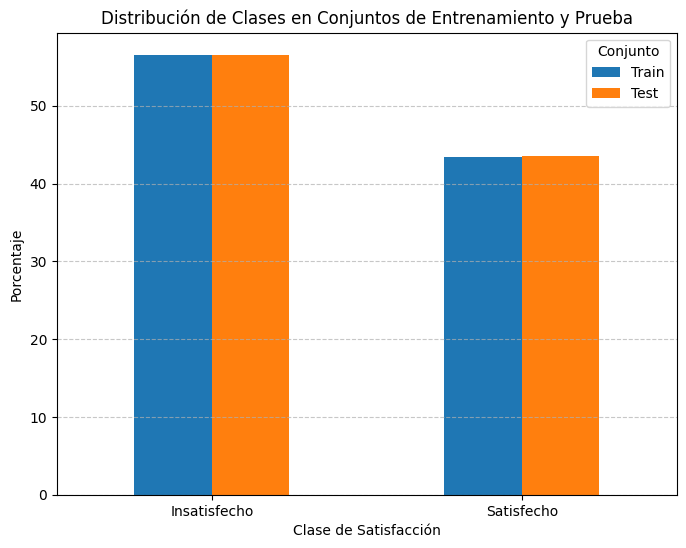

In [ ]:
# Verificar el balance de clases en el conjunto de entrenamiento
train_class_distribution = y_train.value_counts(normalize=True) * 100
print("Distribución de clases en el conjunto de entrenamiento (%):")
print(train_class_distribution)

# Verificar el balance de clases en el conjunto de prueba
test_class_distribution = y_test.value_counts(normalize=True) * 100
print("\nDistribución de clases en el conjunto de prueba (%):")
print(test_class_distribution)

# Comparación visual
class_distribution_df = pd.DataFrame({
    'Train': train_class_distribution,
    'Test': test_class_distribution
})

class_distribution_df.plot(kind='bar', figsize=(8, 6))
plt.title('Distribución de Clases en Conjuntos de Entrenamiento y Prueba')
plt.xlabel('Clase de Satisfacción')
plt.ylabel('Porcentaje')
plt.xticks(ticks=[0, 1], labels=['Insatisfecho', 'Satisfecho'], rotation=0)
plt.legend(title='Conjunto')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Optimización de Modelos con Grid Search

El Grid Search es una técnica para encontrar los mejores hiperparámetros para un modelo. Consiste en definir una cuadrícula de valores de hiperparámetros a probar y evaluar el modelo para cada combinación.

Vamos a aplicar Grid Search a algunos de los modelos que mostraron buen rendimiento, como XGBoost, SVM y Random Forest, para ver si podemos mejorar aún más sus métricas.

**Nota:** El Grid Search puede ser computacionalmente costoso, especialmente con grandes conjuntos de datos y muchas combinaciones de hiperparámetros. Empezaremos con una cuadrícula pequeña.

### Grid Search para XGBoost

Ejecutando Grid Search para XGBoost...
Fitting 3 folds for each of 16 candidates, totalling 48 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:23:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Mejores hiperparámetros para XGBoost: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Mejor Accuracy de entrenamiento con Grid Search para XGBoost: 0.9616261164151524

Reporte de Clasificación del mejor modelo XGBoost con Grid Search:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     18347
           1       0.98      0.94      0.96     14123

    accuracy                           0.96     32470
   macro avg       0.96      0.96      0.96     32470
weighted avg       0.96      0.96      0.96     32470



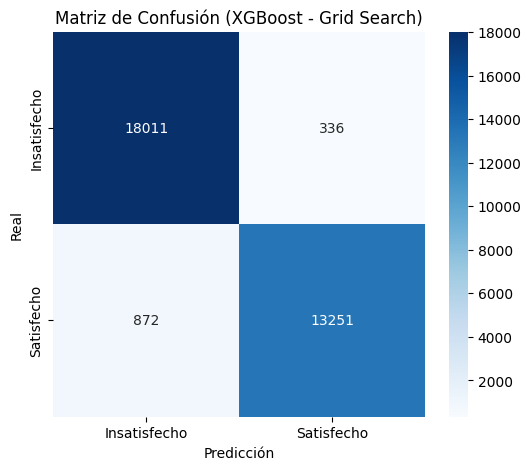

In [ ]:
from sklearn.model_selection import GridSearchCV

# Definir la cuadrícula de hiperparámetros a probar
# Estos son solo ejemplos, puedes ajustarlos según tus necesidades
param_grid_xgb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'colsample_bytree': [0.7, 1.0]
}

# Inicializar el modelo XGBoost
xgb_model_gs = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False)

# Inicializar Grid Search
grid_search_xgb = GridSearchCV(estimator=xgb_model_gs, param_grid=param_grid_xgb, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)

# Ejecutar Grid Search
print("Ejecutando Grid Search para XGBoost...")
grid_search_xgb.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros y la mejor puntuación
print("\nMejores hiperparámetros para XGBoost:", grid_search_xgb.best_params_)
print("Mejor Accuracy de entrenamiento con Grid Search para XGBoost:", grid_search_xgb.best_score_)

# Evaluar el mejor modelo encontrado por Grid Search en el conjunto de prueba
best_xgb_model = grid_search_xgb.best_estimator_
y_pred_xgb_gs = best_xgb_model.predict(X_test)

print("\nReporte de Clasificación del mejor modelo XGBoost con Grid Search:")
print(classification_report(y_test, y_pred_xgb_gs))

# Matriz de confusión para el mejor modelo XGBoost
conf_matrix_xgb_gs = confusion_matrix(y_test, y_pred_xgb_gs)
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix_xgb_gs, annot=True, fmt='d', cmap='Blues', xticklabels=['Insatisfecho', 'Satisfecho'], yticklabels=['Insatisfecho', 'Satisfecho'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión (XGBoost - Grid Search)')
plt.show()

### Grid Search para Random Forest

Ejecutando Grid Search para Random Forest...
Fitting 3 folds for each of 24 candidates, totalling 72 fits

Mejores hiperparámetros para Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Mejor Accuracy de entrenamiento con Grid Search para Random Forest: 0.961923827122472

Reporte de Clasificación del mejor modelo Random Forest con Grid Search:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     18347
           1       0.97      0.94      0.96     14123

    accuracy                           0.96     32470
   macro avg       0.96      0.96      0.96     32470
weighted avg       0.96      0.96      0.96     32470



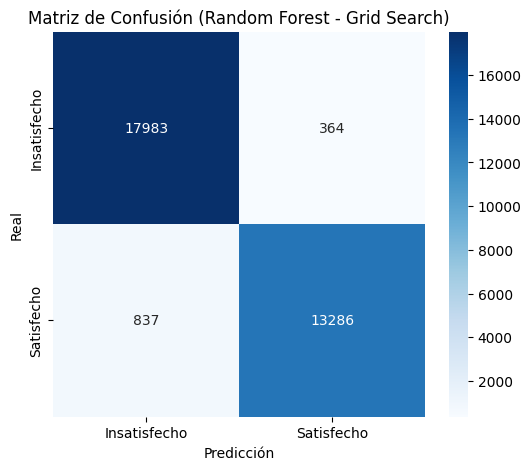

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Definir la cuadrícula de hiperparámetros a probar
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None], # None significa profundidad máxima ilimitada
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Inicializar el modelo Random Forest
rf_model_gs = RandomForestClassifier(random_state=42)

# Inicializar Grid Search
grid_search_rf = GridSearchCV(estimator=rf_model_gs, param_grid=param_grid_rf, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)

# Ejecutar Grid Search
print("Ejecutando Grid Search para Random Forest...")
grid_search_rf.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros y la mejor puntuación
print("\nMejores hiperparámetros para Random Forest:", grid_search_rf.best_params_)
print("Mejor Accuracy de entrenamiento con Grid Search para Random Forest:", grid_search_rf.best_score_)

# Evaluar el mejor modelo encontrado por Grid Search en el conjunto de prueba
best_rf_model = grid_search_rf.best_estimator_
y_pred_rf_gs = best_rf_model.predict(X_test)

print("\nReporte de Clasificación del mejor modelo Random Forest con Grid Search:")
print(classification_report(y_test, y_pred_rf_gs))

# Matriz de confusión para el mejor modelo Random Forest
conf_matrix_rf_gs = confusion_matrix(y_test, y_pred_rf_gs)
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix_rf_gs, annot=True, fmt='d', cmap='Blues', xticklabels=['Insatisfecho', 'Satisfecho'], yticklabels=['Insatisfecho', 'Satisfecho'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión (Random Forest - Grid Search)')
plt.show()

### Grid Search para SVM

**Nota:** Grid Search con SVM puede ser muy lento en datasets grandes. Empezaremos con una cuadrícula de hiperparámetros muy pequeña. Si el tiempo de ejecución es excesivo, considera reducir aún más la cuadrícula o utilizar Randomized Search.

Ejecutando Grid Search para SVM...
Fitting 3 folds for each of 4 candidates, totalling 12 fits

Mejores hiperparámetros para SVM: {'C': 1, 'gamma': 'auto'}
Mejor Accuracy de entrenamiento con Grid Search para SVM: 0.9520788420080074

Reporte de Clasificación del mejor modelo SVM con Grid Search:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     18347
           1       0.96      0.93      0.95     14123

    accuracy                           0.95     32470
   macro avg       0.95      0.95      0.95     32470
weighted avg       0.95      0.95      0.95     32470



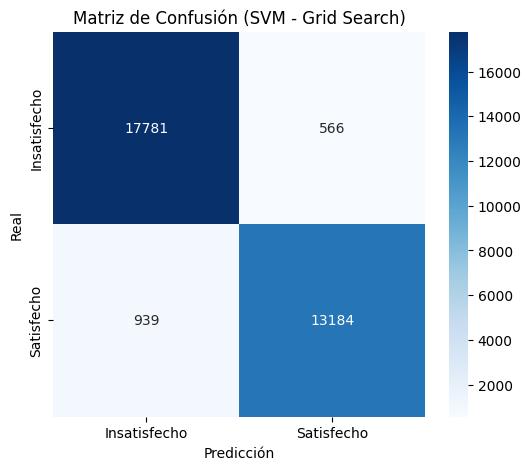

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Definir la cuadrícula de hiperparámetros a probar
# Cuadrícula muy pequeña por razones de rendimiento
param_grid_svm = {
    'C': [0.1, 1],
    'gamma': ['scale', 'auto']
}

# Inicializar el modelo SVM
svm_model_gs = SVC(random_state=42)

# Inicializar Grid Search
# Usamos los datos escalados para SVM
grid_search_svm = GridSearchCV(estimator=svm_model_gs, param_grid=param_grid_svm, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)

# Ejecutar Grid Search
print("Ejecutando Grid Search para SVM...")
# Asegúrate de usar los datos escalados
grid_search_svm.fit(X_train_scaled, y_train)

# Mostrar los mejores hiperparámetros y la mejor puntuación
print("\nMejores hiperparámetros para SVM:", grid_search_svm.best_params_)
print("Mejor Accuracy de entrenamiento con Grid Search para SVM:", grid_search_svm.best_score_)

# Evaluar el mejor modelo encontrado por Grid Search en el conjunto de prueba
best_svm_model = grid_search_svm.best_estimator_
# Asegúrate de usar los datos de prueba escalados para la predicción
y_pred_svm_gs = best_svm_model.predict(X_test_scaled)

print("\nReporte de Clasificación del mejor modelo SVM con Grid Search:")
print(classification_report(y_test, y_pred_svm_gs))

# Matriz de confusión para el mejor modelo SVM
conf_matrix_svm_gs = confusion_matrix(y_test, y_pred_svm_gs)
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix_svm_gs, annot=True, fmt='d', cmap='Blues', xticklabels=['Insatisfecho', 'Satisfecho'], yticklabels=['Insatisfecho', 'Satisfecho'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión (SVM - Grid Search)')
plt.show()